In [352]:
import pandas as pd
import json
import requests as req
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import time

In [361]:
movie_df = pd.read_csv('movie_df.csv') #low_memory=False
#movie_df = movie_df.head(50)   ######
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

movie_df = movie_df[movie_df["release_date"] > '2007']

del movie_df['budget']
del movie_df['Unnamed: 0']
del movie_df['vote_average']
del movie_df['vote_count']

movie_df = movie_df[movie_df.revenue != 0.0]
len(movie_df)

2451

In [363]:
url = "http://www.omdbapi.com/?i="
rating_list = []
for ID in movie_df['imdb_id']:
    response = req.get(url+ID+"&apikey=trilogy").json()

    final_response = (response['Title'],
               response['imdbRating'],
               response['imdbVotes'],
                      response['Genre'])
    rating_list.append(final_response)


In [364]:
ratings = pd.DataFrame(rating_list, columns = ('title','rating','rating count', 'Genre'))

In [366]:
my_ratings = []
for i in ratings['Genre']:
   help = i.split(',')
   my_ratings.append((help[0]))
my_ratings

#del movie_df['Rating Count']
movie_df.reset_index(drop=True,inplace=True)
ratings['genre'] = my_ratings
#del ratings['Genre']
ratings.head(3)

,title,rating,rating count,genre
0,Day of the Falcon,6.7,"9,810",Adventure
1,Freedom Writers,7.5,"57,032",Biography
2,Code Name: The Cleaner,4.5,"10,275",Action


In [368]:
merge_df = pd.merge(movie_df, ratings, on = 'title')
del merge_df['genres']
merge_df.head(3)

,belongs_to_collection,id,imdb_id,original_language,overview,release_date,revenue,title,rating,rating count,genre
0,NaN,1646,tt0463998,en,A young teacher inspires her class of at-risk ...,2007-01-05,41170784.0,Freedom Writers,7.5,"57,032",Biography
1,NaN,14396,tt0462229,en,"Cedric the Entertainer plays Jake, a seemingly...",2007-01-05,10337477.0,Code Name: The Cleaner,4.5,"10,275",Action
2,"{'id': 160727, 'name': 'Stomp the Yard Collect...",1931,tt0775539,en,"After the death of his younger brother, a trou...",2007-05-16,75511123.0,Stomp the Yard,5.3,"20,269",Drama


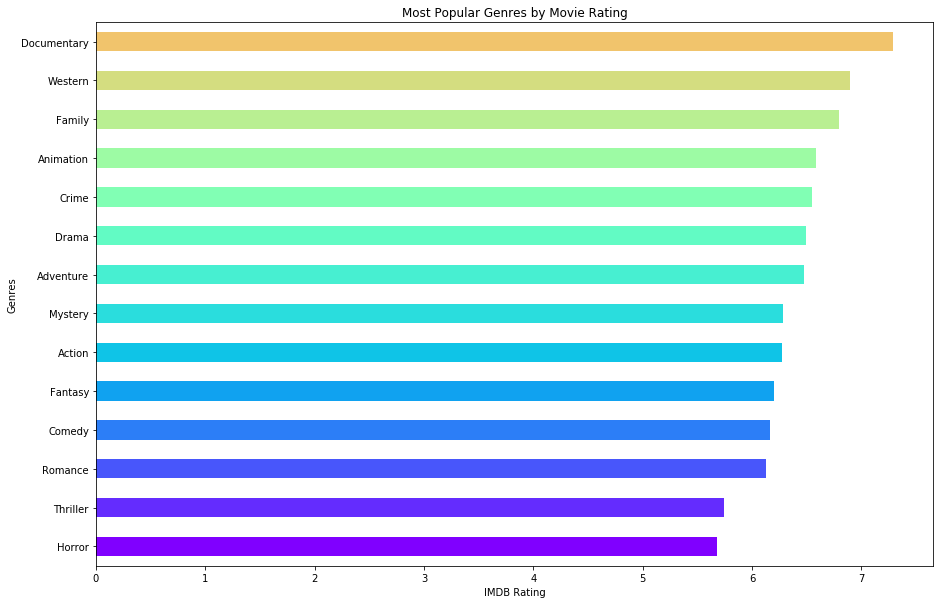

In [372]:
genres_list = [ 'Adventure', 'Action', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
               'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
               'TV Movie', 'Thriller', 'War', 'Western']

merge_df['rating'] = merge_df['rating'].astype('float')

new_merge = merge_df[merge_df['genre'].isin(genres_list)]
new_merge       

y = new_merge['rating'].groupby(new_merge['genre']).mean()
y = y.sort_values(ascending=True)

colors = plt.cm.rainbow(np.linspace(0, 1, len(genres_list)))

y.plot(kind="barh", figsize = (15,10), color=colors)

plt.title('Highest Rated Movie Genres')
plt.ylabel('Genres')
plt.xlabel('IMDB Rating')

plt.savefig("Highest Rated Movie Genres.png")
plt.show()



In [373]:
print(colors)

[[  5.00000000e-01   0.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  3.90196078e-01   1.71625679e-01   9.96283653e-01   1.00000000e+00]
 [  2.80392157e-01   3.38158275e-01   9.85162233e-01   1.00000000e+00]
 [  1.70588235e-01   4.94655843e-01   9.66718404e-01   1.00000000e+00]
 [  6.07843137e-02   6.36474236e-01   9.41089253e-01   1.00000000e+00]
 [  5.68627451e-02   7.67362681e-01   9.05873422e-01   1.00000000e+00]
 [  1.66666667e-01   8.66025404e-01   8.66025404e-01   1.00000000e+00]
 [  2.76470588e-01   9.38988361e-01   8.19740483e-01   1.00000000e+00]
 [  3.86274510e-01   9.84086337e-01   7.67362681e-01   1.00000000e+00]
 [  5.03921569e-01   9.99981027e-01   7.04925547e-01   1.00000000e+00]
 [  6.13725490e-01   9.84086337e-01   6.41213315e-01   1.00000000e+00]
 [  7.23529412e-01   9.38988361e-01   5.72735140e-01   1.00000000e+00]
 [  8.33333333e-01   8.66025404e-01   5.00000000e-01   1.00000000e+00]
 [  9.43137255e-01   7.67362681e-01   4.23548513e-01   1.00000000e+00]
 [  1.